## Capstone Project - The Battle of the Neighborhoods (Week 2)

Applied Data Science Capstone by IBM/Coursera

### Table of contents
1. **Introduction**  
1.1 Client  
1.2 Problem    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.1 Brief description of Vancouver from an open-source, Wikipedia    
1.3 Solution  
2. **Data and Strategy**  
2.1 Importing all the necessary Libraries  
2.2 Reading from the Dataset  
2.3 Idenfying Total Crimes in different Neighborhoods  
2.4 Gathering additional information about the Neighborhood from Wikipedia  
2.5 Merging the Crime data Table to include Boroughs  
2.6 Cleaning the data by dropping rows with invalid data   

3. **Methodology**  
3.1 Exploratory Data Analysis    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.1 Pivoting the table to better understand the data by crimes per borough    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.2 Merging the Pivoted Column with other columns    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.3 Pivoting the table to better understand the data by crimes per neighborhood    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.4 Merging the Pivoted Column with other columns    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.5 Expolring the data by Visualising     
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.6 Sorting the data by crimes per neighborhood    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.7 Restricting the rows in the data frame to only those with West side as Borough    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.8 Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.9 Glimpse of the new Data Frame with Neighborhoods in West Side Borough of Vancouver along with centroid of their co-ordinates    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.10 Fetching the Geographical co-ordiantes of Vancouver to plot on Map   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.11 Using Folium to plot Vancouver City's West Side Borough and it's Neighborhoods    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.12 Setting Up Foursquare Credentials    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.13 Generating Venues    
3.2 Modelling  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1 Identifying Top 5 most common venues across neighborhoods    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.2 Creating the new dataframe and display the top 10 venues for each neighborhood    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.3 Clustering Neighbourhoods  
4. **Analysis**  
4.1 Examining the resulting Clusters
5. **Results and Discussion**
6. **Conclusion**

### 1. Introduction
#### 1.1 Client:
US based company with main business of letting individuals or small companies rent workplace or even whole rooms in company's so called **co-working offices**.
#### 1.2 Problem: 
Company wants to grow and enter new market. It's required to identify safe and secure location in **Vancouver, Canada**, to open commercial establishment, specifically, **co-working office**.

**1.2.1 Brief description of Vancouver from an open-source, Wikipedia:**

Vancouver is a coastal seaport city in western Canada, located in the Lower Mainland region of British Columbia. 
The Greater Vancouver area had a population of 2,463,431 as in 2016, making it the third-largest metropolitan area in Canada. 

Vancouver has the highest population density in Canada, with over 5,400 people per square kilometre, which makes it the fifth-most densely populated city with over 250,000 residents in North America, behind New York City, Guadalajara, San Francisco, and Mexico City. 
Vancouver is consistently named as one of the top five worldwide cities for livability and quality of life, and the Economist Intelligence Unit acknowledged it as the first city ranked among the top ten of the world's most well-living cities for ten consecutive years. 
In 2011, the city planned to become the greenest city in the world by 2020. Vancouverism is the city's urban planning design philosophy.

Crime in different forms is a prevalent distress to the people in Metropolitan cities and Vancouver is no exception. 
Crimes like break into commercial property to for theft are on rise and people thinking to enter into similar business should bear in mind criminal activity of the neighborhood before finalizing a location. 
We look to address this issue by analyzing the crime data of Vancouver City and finding the safest borough and a neighborhood with in the borough which best suits the requirements of our business problem.

#### 1.3 Solution:
Identification of the safest borough is done thru analyzing crime data and shortlisting neighbourhood, where co-working offices are not amongst the most commom venues, and yet as close to the city as possible.
Data science tools will be used to analyze data and focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood where co-working offices are not amongst the most common venue can be selected.

### 2. Data and Strategy



There are several points which will influence on the decision:
    
1. finding the safest borough based on crime statistics;
2. finding the most common venues;
3. choosing the right neighbourhood within the borough.

Geographical coordinates of Vancouver will be used to plot neighbourhoods in a borough that is safe and in the city's vicinity, and finally cluster our neighborhoods and present our findings.

1. Using a real world data set from **Kaggle** containing the Vancouver Crimes from 2003 to 2019:  
A dataset consisting of the crime statistics of each neighbourhood in Vancouver along with additional information such as type of crime, recorded year, month and hour.

2. Gathering additional information of the list of officially categorized boroughs in Vancouver from **Wikipedia**:  
Borough information will be used to map the existing data where each neighbourhood can be assigned with its respective borough.

3. Creating a new consolidated dataset of the neighborhoods, along with their boroughs, crime data and the respective neighbourhood's co-ordinates: This latitude and longitude data will be fetched using **OpenCage Geocoder** to explore the neighbourhood by plotting it on maps using **Folium** and perform exploratory data analysis.

4. Creating a new consolidated dataset of the neighborhoods, boroughs, and the most common venues and the respective neighbourhood along with co-ordinates: This data will be fetched using **Foursquare API** to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### Using a real world data set from Kaggle containing the Vancouver Crimes from 2003 to 2019

####  Vancouver Crime Report 

Properties of the Crime Report:

1. TYPE - Crime type
2. YEAR - Recorded year
3. MONTH - Recorded month
4. DAY - Recorded day
5. HOUR - Recorded hour
6. MINUTE - Recorded minute
7. HUNDRED_BLOCK - Recorded block
8. NEIGHBOURHOOD - Recorded neighborhood
9. X - GPS longtitude
10. Y - GPS latitude

Data set URL: https://www.kaggle.com/agilesifaka/vancouver-crime-report/version/2

Note:
The dataset is collected from the City of Vancouver Open Data Catalogue.

#### 2.1 Importing all the necessary Libraries

In [3]:
import numpy as np #import numpy
import pandas as pd #import pandas

!pip install opencage #install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
from opencage.geocoder import OpenCageGeocode #import OpenCage Geocoder

%matplotlib inline 
#use the inline backend to generate the plots within the browser
import matplotlib as mpl #import matplotlib
import matplotlib.pyplot as plt #import matplotlib associated packages to perform Data Visualisation and Exploratory Data Analysis
mpl.style.use('ggplot') # optional: for ggplot-like style
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0 # check for latest version of Matplotlib
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors


!pip -q install folium #install folium
import folium #Importing folium to visualise Maps and plot based on Lat and Lng
import requests #Requests to request web pages by making get requests to FourSquare REST Client
from pandas.io.json import json_normalize #To normalise data returned by FourSquare API
from sklearn.cluster import KMeans #Importing KMeans from SciKit library to Classify neighborhoods into clusters

print('Libraries imported')

Matplotlib version:  3.0.2
Libraries imported


#### 2.2 Reading from the Dataset

In [4]:
vnc_crime_df = pd.read_csv('https://raw.githubusercontent.com/abdrassilov/coursera_capstone/master/vancouver_crime_records_2018.csv', index_col=None)
vnc_crime_df.drop(['Unnamed: 0','MINUTE','HUNDRED_BLOCK','X','Y'], axis = 1, inplace = True) #dropping corrupted X,Y (represent Lat, Lng) data as Coordinates
vnc_crime_df.columns = ['Type', 'Year','Month','Day','Hour','Neighbourhood'] #columns names changed to lowercase
vnc_crime_df.head()

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District


#### 2.3 Identifying Total Crimes in different Neighborhoods

In [5]:
vnc_crime_df['Neighbourhood'].value_counts()

Central Business District    10857
West End                      3031
Mount Pleasant                2396
Strathcona                    1987
Kitsilano                     1802
Fairview                      1795
Renfrew-Collingwood           1762
Grandview-Woodland            1761
Kensington-Cedar Cottage      1391
Hastings-Sunrise              1270
Sunset                         967
Riley Park                     866
Marpole                        828
Victoria-Fraserview            600
Killarney                      565
Oakridge                       499
Dunbar-Southlands              474
Kerrisdale                     417
Shaughnessy                    414
West Point Grey                372
Arbutus Ridge                  311
South Cambie                   292
Stanley Park                   154
Musqueam                        17
Name: Neighbourhood, dtype: int64

#### 2.4 Gathering additional information about the Neighborhood from Wikipedia

As part of data set Borough which the neighborhood was part of was not categorized, so we will create a dictionary of Neighborhood and based on data in the following [Wikipedia page](https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Vancouver).

In [6]:
column_names = ['Neighbourhood', 'Borough'] #define the dataframe columns
vnc_neigh_bor = pd.DataFrame(columns=column_names) #instantiate the dataframe

vnc_neigh_bor['Neighbourhood'] = vnc_crime_df['Neighbourhood'].unique()

neigh_bor_dict = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(neigh_bor_dict, vnc_neigh_bor['Neighbourhood']):
  vnc_neigh_bor.loc[vnc_neigh_bor.Neighbourhood == row, 'Borough'] = neigh_bor_dict.get(row)

vnc_neigh_bor.dropna(inplace=True)
print("Total Neighbourhood Count",len(vnc_neigh_bor['Neighbourhood']),"Borough Count",len(vnc_neigh_bor['Borough'].unique()))
vnc_neigh_bor.head()

Total Neighbourhood Count 24 Borough Count 4


,Neighbourhood,Borough
0,West End,Central
1,Central Business District,Central
2,Hastings-Sunrise,East Side
3,Grandview-Woodland,East Side
4,Mount Pleasant,East Side


#### 2.5 Merging the Crime data Table to include Boroughs

In [7]:
vnc_boroughs_crime = pd.merge(vnc_crime_df,vnc_neigh_bor, on='Neighbourhood') #merge crime data table with created dictionary
vnc_boroughs_crime.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Borough
0,Break and Enter Commercial,2018,3,2,6,West End,Central
1,Break and Enter Commercial,2018,6,16,18,West End,Central
2,Break and Enter Commercial,2018,12,12,0,West End,Central
3,Break and Enter Commercial,2018,3,2,3,West End,Central
4,Break and Enter Commercial,2018,3,17,11,West End,Central


#### 2.6 Cleaning the data by dropping rows with invalid data

In [8]:
vnc_boroughs_crime.dropna(inplace=True)
vnc_boroughs_crime['Borough'].value_counts()

Central            14042
East Side          12400
West Side           7204
South Vancouver     1182
Name: Borough, dtype: int64

### 3. Methodology

Categorized the methodology section into two parts:

__Exploratory Data Analysis:__ Visualise the crime repots in different Vancouver boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.


__Modelling:__ To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

#### 3.1 Exploratory Data Analysis

#### 3.1.1 Pivoting the table to better understand the data by crimes per borough

In [9]:
vnc_crime_cat = pd.pivot_table(vnc_boroughs_crime,values=['Year'],index=['Borough'],columns=['Type'],aggfunc=len,fill_value=0,margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                787                               198   
East Side                              786                              1043   
South Vancouver                         49                               156   
West Side                              403                              1000   
All                                   2025                              2397   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2280        2489               6871              857   
East Side           2192        1674               4754              678   
South Vancouver      187          88                483               36   
West Side           1062         696               2838              588   
All                 5721        4947              14946             2159   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      245   
East Side                    605   
South Vancouver               71   
West Side                    225   
All                         1146   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        8       
South Vancouver                                                  1       
West Side                                                        3       
All                                                             13       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        314    14042  
East Side                                                      660    12400  
South Vancouver                                                111     1182  
West Side                                                      389     7204  
All                                                           1474    34828

#### 3.1.2 Merging the Pivoted Column with other columns

In [10]:
vnc_crime_cat.reset_index(inplace = True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total'}, inplace=True)
vnc_crime_cat = vnc_crime_cat.head(4) #ignore bottom All in Borough
vnc_crime_cat

,Borough,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


#### 3.1.3 Pivoting the table to better understand the data by crimes per neighborhood

In [11]:
vnc_crime_neigh = pd.pivot_table(vnc_boroughs_crime,values=['Year'],index=['Neighbourhood'],columns=['Type'],aggfunc=len,fill_value=0,margins=True)
vnc_crime_neigh

Year  \
Type                      Break and Enter Commercial   
Neighbourhood                                          
Arbutus Ridge                                     12   
Central Business District                        551   
Dunbar-Southlands                                  8   
Fairview                                         138   
Grandview-Woodland                               148   
Hastings-Sunrise                                  48   
Kensington-Cedar Cottage                          62   
Kerrisdale                                        24   
Killarney                                         34   
Kitsilano                                        106   
Marpole                                           44   
Mount Pleasant                                   205   
Musqueam                                           0   
Oakridge                                          19   
Renfrew-Collingwood                               91   
Riley Park                                        35   
Shaughnessy                                       12   
South Cambie                                      22   
Stanley Park                                       6   
Strathcona                                       160   
Sunset                                            37   
Victoria-Fraserview                               15   
West End                                         230   
West Point Grey                                   18   
All                                             2025   

                                                                      \
Type                      Break and Enter Residential/Other Mischief   
Neighbourhood                                                          
Arbutus Ridge                                            78       49   
Central Business District                               124     1812   
Dunbar-Southlands                                       106       81   
Fairview                                                 73      233   
Grandview-Woodland                                      162      304   
Hastings-Sunrise                                        117      195   
Kensington-Cedar Cottage                                145      255   
Kerrisdale                                               97       49   
Killarney                                                72       90   
Kitsilano                                               165      320   
Marpole                                                 125      134   
Mount Pleasant                                          124      353   
Musqueam                                                  4        3   
Oakridge                                                123       64   
Renfrew-Collingwood                                     156      243   
Riley Park                                              122      140   
Shaughnessy                                             120       41   
South Cambie                                             42       41   
Stanley Park                                              2        8   
Strathcona                                              124      527   
Sunset                                                   93      175   
Victoria-Fraserview                                      80       94   
West End                                                 72      460   
West Point Grey                                          71       50   
All                                                    2397     5721   

                                                                           \
Type                      Other Theft Theft from Vehicle Theft of Bicycle   
Neighbourhood                                                               
Arbutus Ridge                      18                111               12   
Central Business District        2034               5301              640   
Dunbar-Southlands                  31                199               16   


#### 3.1.4 Merging the Pivoted Column with other columns

In [12]:
vnc_crime_neigh.reset_index(inplace = True)
vnc_crime_neigh.columns = vnc_crime_neigh.columns.map(''.join)
vnc_crime_neigh.rename(columns={'YearAll':'Total'}, inplace=True)
vnc_crime_neigh.head()

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
2,Dunbar-Southlands,8,106,81,31,199,16,9,1,23,474
3,Fairview,138,73,233,297,692,245,55,0,62,1795
4,Grandview-Woodland,148,162,304,215,634,110,123,0,65,1761


#### Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [13]:
vnc_crime_cat.describe()

,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
count,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,506.250000,599.250000,1430.25000,1236.750000,3736.500000,539.750000,286.500000,3.250000,368.500000,8707.000000
std,354.409721,488.189427,997.26572,1060.087221,2723.536977,353.955153,226.117226,3.304038,227.060198,5801.870618
min,49.000000,156.000000,187.00000,88.000000,483.000000,36.000000,71.000000,1.000000,111.000000,1182.000000
25%,314.500000,187.500000,843.25000,544.000000,2249.250000,450.000000,186.500000,1.000000,263.250000,5698.500000
50%,594.500000,599.000000,1627.00000,1185.000000,3796.000000,633.000000,235.000000,2.000000,351.500000,9802.000000
75%,786.250000,1010.750000,2214.00000,1877.750000,5283.250000,722.750000,335.000000,4.250000,456.750000,12810.500000
max,787.000000,1043.000000,2280.00000,2489.000000,6871.000000,857.000000,605.000000,8.000000,660.000000,14042.000000


#### 3.1.5 Expolring the data by Visualising

It's time to visualize data for a clear view. 
All required libraries were installed earlier. 

#### 3.1.6 Sorting the data by crimes per neighborhood

In [14]:
vnc_crime_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )
crime_neigh_top5 = vnc_crime_neigh.iloc[1:6]
crime_neigh_top5

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
22,West End,230,72,460,455,1461,203,77,1,72,3031
11,Mount Pleasant,205,124,353,493,822,232,67,0,100,2396
19,Strathcona,160,124,527,81,821,108,76,2,88,1987
9,Kitsilano,106,165,320,154,755,189,51,1,61,1802


#### Five Neighborhoods with highest crime

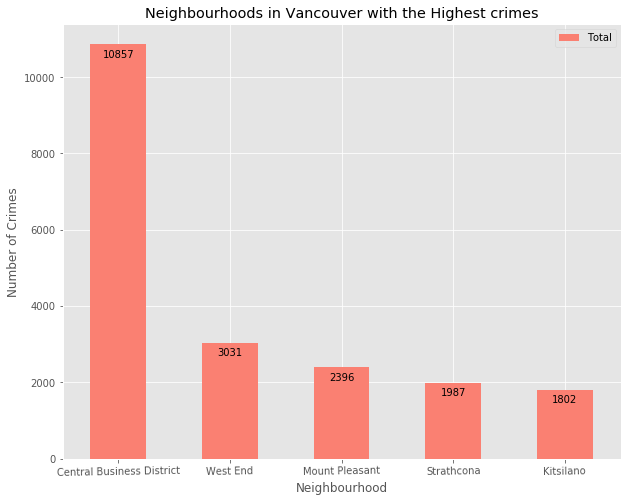

In [59]:
per_neigh = crime_neigh_top5[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 8), color='#FA8072',width=0.5, rot=1)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, -10), 
                textcoords='offset points',
                fontsize = 10,
               )

plt.show()

#### Five Neighborhoods with lowest crime

In [55]:
crime_neigh_low = vnc_crime_neigh.tail(5)
crime_neigh_low

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
23,West Point Grey,18,71,50,11,157,32,11,0,22,372
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
17,South Cambie,22,42,41,38,111,19,8,0,11,292
18,Stanley Park,6,2,8,0,109,14,3,0,12,154
12,Musqueam,0,4,3,0,4,2,2,0,2,17


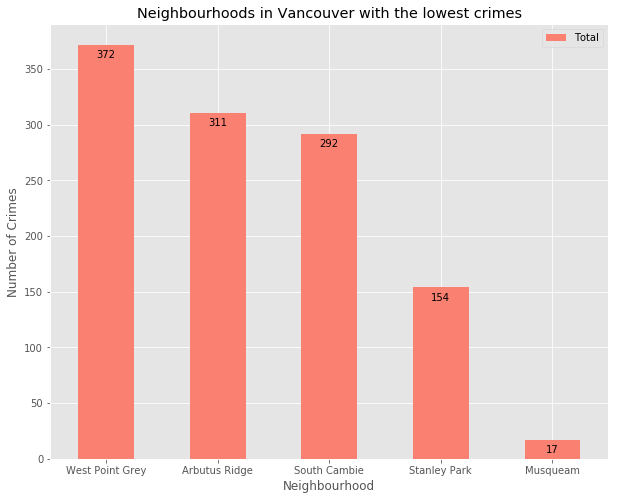

In [58]:
per_neigh = crime_neigh_low[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 8),color='#FA8072',width=0.5, rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, -10), 
                textcoords='offset points',
                fontsize = 10,
               )

plt.show()

#### Borough is Vancouver with Highest Crime

In [60]:
vnc_crime_cat = pd.pivot_table(vnc_boroughs_crime,values=['Year'],index=['Borough'],columns=['Type'],aggfunc=len,fill_value=0,margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                787                               198   
East Side                              786                              1043   
South Vancouver                         49                               156   
West Side                              403                              1000   
All                                   2025                              2397   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2280        2489               6871              857   
East Side           2192        1674               4754              678   
South Vancouver      187          88                483               36   
West Side           1062         696               2838              588   
All                 5721        4947              14946             2159   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      245   
East Side                    605   
South Vancouver               71   
West Side                    225   
All                         1146   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        8       
South Vancouver                                                  1       
West Side                                                        3       
All                                                             13       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        314    14042  
East Side                                                      660    12400  
South Vancouver                                                111     1182  
West Side                                                      389     7204  
All                                                           1474    34828

In [61]:
vnc_crime_cat.reset_index(inplace = True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total',
                              'YearBreak and Enter Commercial' : 'Break and Enter Commercial',
                              'YearBreak and Enter Residential/Other' : 'Break and Enter Residential',
                              'YearMischief' : 'Mischief',
                              'YearOther Theft' : 'Other',
                              'YearTheft from Vehicle' : 'Theft from Vehicle',
                              'YearTheft of Bicycle' : 'Theft of Bicycle',
                              'YearTheft of Vehicle' : 'Theft of Vehicle',
                              'YearVehicle Collision or Pedestrian Struck (with Fatality)' : 'Vehicle Collision or Pedestrian Struck (with Fatality)',
                              'YearVehicle Collision or Pedestrian Struck (with Injury)' : 'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)
vnc_crime_cat = vnc_crime_cat.head(4) #ignore bottom All in Borough
vnc_crime_cat

,Borough,Break and Enter Commercial,Break and Enter Residential,Mischief,Other,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


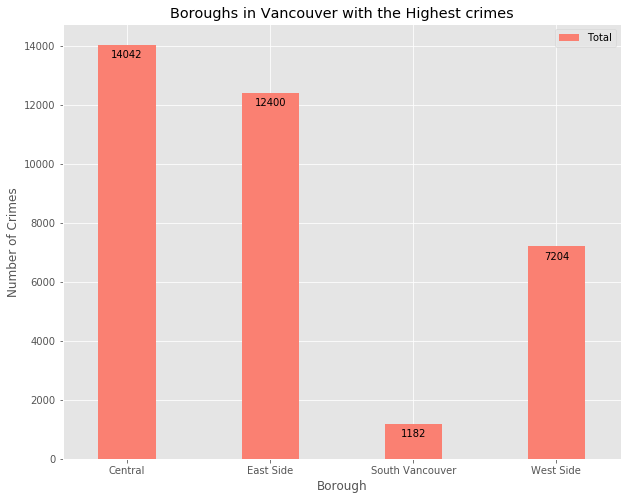

In [109]:
per_borough = vnc_crime_cat[['Borough','Total']]

per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 8),color='#FA8072',width=0.4, rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Boroughs in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, -10), 
                textcoords='offset points',
                fontsize = 10,
               )

plt.show()

#### Based on exploratory data analysis it is clear that South Vancouver has the lowest crimes. 
#### Since South Vancouver has very little number of neighborhoods and opening a commercial establishment would not be viable, we can choose the next borough with lowest crime which is **West Side**.

#### Different types of crimes recorded in the West Side Borough
#### West side was chosen because crime type Break and enter Commercial is also low amongst other crimes types which makes West Side ideal destination for opening of commercial establishments

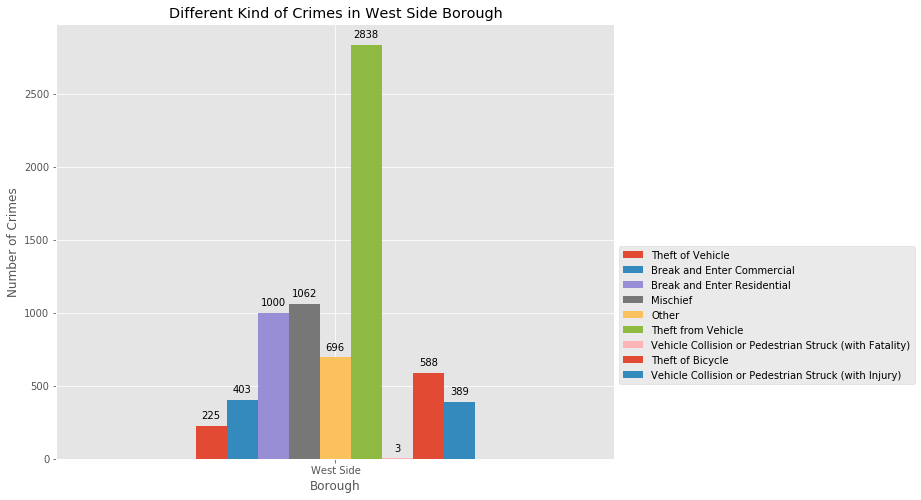

In [71]:
vnc_ws_df = vnc_crime_cat[vnc_crime_cat['Borough'] == 'West Side']
vnc_ws_df = vnc_ws_df.sort_values(['Total'], ascending = True, axis = 0)

vnc_ws = vnc_ws_df[['Borough','Theft of Vehicle', 'Break and Enter Commercial','Break and Enter Residential','Mischief','Other',
                 'Theft from Vehicle','Vehicle Collision or Pedestrian Struck (with Fatality)','Theft of Bicycle',
                 'Vehicle Collision or Pedestrian Struck (with Injury)']]


vnc_ws.set_index('Borough',inplace = True)

ax = vnc_ws.plot(kind='bar', figsize=(10, 8),width=0.5, rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Different Kind of Crimes in West Side Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 10
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

#### Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.

#### This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

#### 3.1.7 Restricting the rows in the data frame to only those with West side as Borough

In [72]:
vnc_ws_neigh = vnc_boroughs_crime

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
vnc_ws_neigh = vnc_ws_neigh[vnc_ws_neigh['Borough'] == 'West Side']
vnc_ws_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in West Side Borough', len(vnc_ws_neigh['Neighbourhood'].unique()))

vnc_ws_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in West Side Borough 10


array(['Shaughnessy', 'Fairview', 'Oakridge', 'Marpole', 'Kitsilano',
       'Kerrisdale', 'West Point Grey', 'Arbutus Ridge', 'South Cambie',
       'Dunbar-Southlands'], dtype=object)

#### 3.1.8 Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder

In [73]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = vnc_ws_neigh['Neighbourhood'].unique()

key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('West Side')
print(Latitude, Longitude) #print('The geograpical coordinate of Vancouver City are {}, {}.'.format(latitude, longitude))

[49.2518626, 49.2641128, 49.2308288, 49.2092233, 49.2694099, 49.2346728, 49.2644843, 49.2409677, 49.2466847, 49.2534601] [-123.1380226, -123.1268352, -123.1311342, -123.1361495, -123.155267, -123.1553893, -123.1854326, -123.1670008, -123.120915, -123.1850439]


#### 3.1.9. Glimpse of the new Data Frame with Neighborhoods in West Side Borough of Vancouver along with centroid of their co-ordinates

In [74]:
ws_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ws_neig_geo = pd.DataFrame(data=ws_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)
ws_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,Shaughnessy,West Side,49.251863,-123.138023
1,Fairview,West Side,49.264113,-123.126835
2,Oakridge,West Side,49.230829,-123.131134
3,Marpole,West Side,49.209223,-123.136150
4,Kitsilano,West Side,49.269410,-123.155267
5,Kerrisdale,West Side,49.234673,-123.155389
6,West Point Grey,West Side,49.264484,-123.185433
7,Arbutus Ridge,West Side,49.240968,-123.167001
8,South Cambie,West Side,49.246685,-123.120915
9,Dunbar-Southlands,West Side,49.253460,-123.185044


#### 3.1.10 Fetching the Geographical co-ordiantes of Vancouver to plot on Map

In [75]:
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


#### 3.1.11 Using Folium to plot Vancouver City's West Side Borough and it's Neighborhoods

In [83]:
van_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ws_neig_geo['Latitude'], ws_neig_geo['Longitude'], ws_neig_geo['Borough'], ws_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FA8072',
        fill_opacity=0.5,
        parse_html=False).add_to(van_map)  
    
van_map

#### Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.
#### This data will be fetched using Foursquare API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### 3.1.12 Setting Up Foursquare Credentials

In [84]:
#Four Square Credentials

CLIENT_ID = 'AEF4V3BJ4SEK1ZWLUQ1MBUWRVUYSKYEGTVR5MKZBPWWRMHMT'
CLIENT_SECRET = 'ZTR2PXF4BHFN0O42KAFU0SN5XDNLID2FIVR04VXZZ1MHYFO1'
VERSION = '20191101'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AEF4V3BJ4SEK1ZWLUQ1MBUWRVUYSKYEGTVR5MKZBPWWRMHMT
CLIENT_SECRET:ZTR2PXF4BHFN0O42KAFU0SN5XDNLID2FIVR04VXZZ1MHYFO1


In [86]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items'] # make the GET request
        
        venues_list.append([( # return only relevant information for each nearby venue
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

#### 3.1.13 Generating Venues

In [87]:
vnc_ws_venues = getNearbyVenues(names=ws_neig_geo['Neighbourhood'],
                                   latitudes=ws_neig_geo['Latitude'],
                                   longitudes=ws_neig_geo['Longitude']
                                  )

Shaughnessy
Fairview
Oakridge
Marpole
Kitsilano
Kerrisdale
West Point Grey
Arbutus Ridge
South Cambie
Dunbar-Southlands


#### Data frame containing venues for each neighborhood in West Side

In [88]:
print(vnc_ws_venues.shape)
vnc_ws_venues.head()

(227, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Shaughnessy,49.251863,-123.138023,Angus Park,Park
1,Shaughnessy,49.251863,-123.138023,Crepe & Cafe,French Restaurant
2,Fairview,49.264113,-123.126835,Gyu-Kaku Japanese BBQ,BBQ Joint
3,Fairview,49.264113,-123.126835,CRESCENT nail and spa,Nail Salon
4,Fairview,49.264113,-123.126835,Charleson Park,Park


#### Venue Count per neighborhood

In [89]:
vnc_ws_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Arbutus Ridge,5
Dunbar-Southlands,5
Fairview,26
Kerrisdale,38
Kitsilano,45
Marpole,30
Oakridge,9
Shaughnessy,2
South Cambie,18


In [62]:
print('There are {} uniques categories.'.format(len(vnc_ws_venues['Venue Category'].unique())))

There are 89 uniques categories.


### 3.2 Modelling

In [90]:
vnc_onehot = pd.get_dummies(vnc_ws_venues[['Venue Category']], prefix="", prefix_sep="") # one hot encoding
vnc_onehot['Neighbourhood'] = vnc_ws_venues['Neighbourhood'] # add neighborhood column back to dataframe

fixed_columns = [vnc_onehot.columns[-1]] + list(vnc_onehot.columns[:-1]) # move neighborhood column to the first column
vnc_onehot = vnc_onehot[fixed_columns]

vnc_onehot.head()

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,...,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fairview,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
vnc_onehot.shape

(227, 90)

In [91]:
vnc_ws_grouped = vnc_onehot.groupby('Neighbourhood').mean().reset_index()
vnc_ws_grouped

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,...,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dunbar-Southlands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fairview,0.000000,0.000000,0.076923,0.038462,0.000000,0.038462,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000
3,Kerrisdale,0.000000,0.000000,0.026316,0.000000,0.026316,0.026316,0.000000,0.000000,0.000000,...,0.000000,0.052632,0.000000,0.026316,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000
4,Kitsilano,0.044444,0.000000,0.022222,0.000000,0.088889,0.000000,0.000000,0.022222,0.000000,...,0.000000,0.022222,0.022222,0.044444,0.000000,0.022222,0.000000,0.000000,0.000000,0.022222
5,Marpole,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000
6,Oakridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000
7,Shaughnessy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,South Cambie,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000
9,West Point Grey,0.000000,0.020408,0.040816,0.000000,0.040816,0.020408,0.020408,0.000000,0.040816,...,0.000000,0.000000,0.000000,0.000000,0.020408,0.040816,0.000000,0.020408,0.020408,0.020408


In [66]:
vnc_ws_grouped.shape

(10, 90)

#### 3.2.1 Identifying Top 5 most common venues across neighborhoods

In [97]:
num_top_venues = 5

for hood in vnc_ws_grouped['Neighbourhood']:
    print("    "+hood+"    ")
    temp = vnc_ws_grouped[vnc_ws_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

    Arbutus Ridge    
            venue  freq
0   Grocery Store   0.2
1          Bakery   0.2
2       Pet Store   0.2
3             Spa   0.2
4  Nightlife Spot   0.2


    Dunbar-Southlands    
                venue  freq
0  Salon / Barbershop   0.2
1  Italian Restaurant   0.2
2   Indian Restaurant   0.2
3      Ice Cream Shop   0.2
4         Pizza Place   0.2


    Fairview    
               venue  freq
0        Coffee Shop  0.15
1   Asian Restaurant  0.08
2               Park  0.08
3  Korean Restaurant  0.04
4   Sushi Restaurant  0.04


    Kerrisdale    
                venue  freq
0         Coffee Shop  0.11
1  Chinese Restaurant  0.08
2            Tea Room  0.05
3      Sandwich Place  0.05
4    Sushi Restaurant  0.05


    Kitsilano    
                 venue  freq
0               Bakery  0.09
1  American Restaurant  0.04
2     Sushi Restaurant  0.04
3    French Restaurant  0.04
4       Ice Cream Shop  0.04


    Marpole    
                   venue  freq
0       Sushi Restaurant 

#### 3.2.2 Creating the new dataframe and display the top 10 venues for each neighborhood

In [98]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [100]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighbourhood'] # create columns according to number of top venues
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns) # create a new dataframe
neighborhoods_venues_sorted['Neighbourhood'] = vnc_ws_grouped['Neighbourhood']

for ind in np.arange(vnc_ws_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vnc_ws_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Spa,Bakery,Pet Store,Grocery Store,Nightlife Spot,Yoga Studio,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant
1,Dunbar-Southlands,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Salon / Barbershop,Pizza Place,Food Truck,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant
2,Fairview,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Diner,Pharmacy,Nail Salon,Falafel Restaurant,Chinese Restaurant,Camera Store
3,Kerrisdale,Coffee Shop,Chinese Restaurant,Tea Room,Pharmacy,Sushi Restaurant,Sandwich Place,Thai Restaurant,Bakery,Gym Pool,Pizza Place
4,Kitsilano,Bakery,American Restaurant,Thai Restaurant,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Ice Cream Shop,Food Truck,French Restaurant,Grocery Store


#### 3.2.3 Clustering Neighbourhoods

In [101]:
kclusters = 5 # set number of clusters
vnc_grouped_clustering = vnc_ws_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vnc_grouped_clustering) # run k-means clustering
kmeans.labels_[0:10] # check cluster labels generated for each row in the dataframe

array([1, 4, 0, 0, 0, 0, 3, 2, 0, 0], dtype=int32)

In [102]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # add clustering labels

vancouver_merged = ws_neig_geo
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood') # merge to add latitude/longitude for each neighborhood
vancouver_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shaughnessy,West Side,49.251863,-123.138023,2,Park,French Restaurant,Yoga Studio,Deli / Bodega,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Truck
1,Fairview,West Side,49.264113,-123.126835,0,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Diner,Pharmacy,Nail Salon,Falafel Restaurant,Chinese Restaurant,Camera Store
2,Oakridge,West Side,49.230829,-123.131134,3,Convenience Store,Bubble Tea Shop,Concert Hall,Vietnamese Restaurant,Pharmacy,Café,Sandwich Place,Fast Food Restaurant,Sushi Restaurant,Dim Sum Restaurant
3,Marpole,West Side,49.209223,-123.136150,0,Sushi Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Dessert Shop,Dim Sum Restaurant,Coffee Shop,Falafel Restaurant,Plaza,Massage Studio
4,Kitsilano,West Side,49.269410,-123.155267,0,Bakery,American Restaurant,Thai Restaurant,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Ice Cream Shop,Food Truck,French Restaurant,Grocery Store


In [103]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10) # create map

x = np.arange(kclusters) # set color scheme for the clusters
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = [] # add markers to the map
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

### 4. Analysis

#### 4.1 Examining the resulting Clusters

#### Cluster 1

In [104]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,West Side,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Diner,Pharmacy,Nail Salon,Falafel Restaurant,Chinese Restaurant,Camera Store
3,West Side,Sushi Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Dessert Shop,Dim Sum Restaurant,Coffee Shop,Falafel Restaurant,Plaza,Massage Studio
4,West Side,Bakery,American Restaurant,Thai Restaurant,Japanese Restaurant,Coffee Shop,Sushi Restaurant,Ice Cream Shop,Food Truck,French Restaurant,Grocery Store
5,West Side,Coffee Shop,Chinese Restaurant,Tea Room,Pharmacy,Sushi Restaurant,Sandwich Place,Thai Restaurant,Bakery,Gym Pool,Pizza Place
6,West Side,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Café,Bakery,Bookstore,Pub,Asian Restaurant,Vegetarian / Vegan Restaurant,Women's Store
8,West Side,Coffee Shop,Bus Stop,Juice Bar,Vietnamese Restaurant,Light Rail Station,Liquor Store,Bank,Café,Malay Restaurant,Sushi Restaurant


#### Cluster 2

In [105]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,West Side,Spa,Bakery,Pet Store,Grocery Store,Nightlife Spot,Yoga Studio,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant


#### Cluster 3

In [106]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Side,Park,French Restaurant,Yoga Studio,Deli / Bodega,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Truck


#### Cluster 4

In [107]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,West Side,Convenience Store,Bubble Tea Shop,Concert Hall,Vietnamese Restaurant,Pharmacy,Café,Sandwich Place,Fast Food Restaurant,Sushi Restaurant,Dim Sum Restaurant


#### Cluster 5

In [108]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,West Side,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Salon / Barbershop,Pizza Place,Food Truck,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant


### 5. Results and Discussion

The main business problem was to help to Client to identify safe and secure borough in Vancouver, Canada, and most suitable neighbourhood within the borogh in order to set up a commercial establishment, specifically, co-working office.
It has been achieved by using open-source data, data analysis tools and technics - based on crime data safest borough with reasonably high number of neigbourhoods was identified. Additionally, by grouping the neighborhoods into clusters to assist the stakeholders, relevent data about venues and safety of a given neighborhood was provided.

### 6. Conclusion

Exploring an open-source data overall picture of crime types and location in Vancouver and its neighbourhoods was obtained. By categorizing them into different boroughs by crime rate, safest one was identified and eventually safest neighbourhoods withih it found was identified.

Thanks,

Askhat